In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# 定义画图函数
def plot_illusion(grey_low,grey_high,grey_middle,width,locate,pic_name):
  '''
  注：灰度值越大，颜色越浅。黑色表示灰度值为0，白色表示灰度值为1。
  grey_low: 左图的背景灰度值，范围在0到1之间，数值越小，背景颜色越浅
  grey_high: 右图的背景灰度值，范围在0到1之间，数值越小，背景颜色越浅
  grey_middle: 中间方块的灰度值，范围在0到1之间，数值越小，方块越浅
  width: 方块的宽度
  locate: 方块左上角在图像中的位置，为二元组(x, y)
  '''
  img_save_path='/home/zhaobenyan/dataset/data_ill'
  gray_square = np.ones((width, width, 3)) * grey_middle
  gray_low_bg = np.ones((300, 300, 3)) * grey_low
  gray_low_bg[locate[0]:locate[0]+width, locate[1]:locate[1]+width, :] = gray_square
  gray_high_bg = np.ones((300, 300, 3)) * grey_high
  gray_high_bg[locate[0]:locate[0]+width, locate[1]:locate[1]+width, :] = gray_square
  gray=np.ones((300, 300, 3)) * grey_middle
  # fig = plt.figure(facecolor='red')
  fig, ax = plt.subplots(1, 3, figsize=(8, 4),facecolor='red')
  ax[0].imshow(gray_low_bg)
  ax[0].set_title(f'background={grey_low}')
  ax[0].axis('off')
  ax[1].imshow(gray_high_bg)
  ax[1].set_title(f'background={grey_high}')
  ax[1].axis('off')
  ax[2].imshow(gray)
  ax[2].set_title(f'grey={grey_middle}')
  ax[2].axis('off')
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
  # plt.savefig(os.path.join(img_save_path, f'{pic_name}'))#第一个是指存储路径，第二个是图片名字
  # plt.close()
  plt.show()

def plot_illusions(inputs):
  for i, (grey_low,grey_high,grey_middle,width,locate) in enumerate(inputs):
    plot_illusion(grey_low,grey_high,grey_middle,width,locate,i)
  plt.show()


def images_to_video(img_path, video_name):
  img_array = []
  imgList = os.listdir(img_path)
  imgList.sort(key=lambda x: float(x.split('.')[0]))  
  print(f"imgList={imgList}")
  
  for count in range(len(imgList)): 
    filename = imgList[count]
    print(f"filename={filename}")
    img = cv2.imread(os.path.join(img_path, filename))
    print(f"img={img}")
    if img is None:
      print(filename + " is an error!")
      continue
    img_array.append(img)

  height, width, layers = img_array[0].shape
  size = (width, height)
  fps = 5  # 设置每帧图像切换的速度
  output_path = f'/home/zhaobenyan/dataset/data_videos/{video_name}.avi'
  out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, size)

  for i in range(len(img_array)):
    out.write(img_array[i])
  out.release()

In [ ]:
# def plot(width,locate,outer,inner,differ):
#   '''
#   width: 方块的宽度
#   locate: 方块左上角在图像中的位置，为二元组(x, y)
#   '''
#   img_save_path='/home/zhaobenyan/dataset/data_ill'
#   gray_square = np.ones((width, width, 3)) * inner
#   gray_low_bg = np.ones((300, 300, 3)) * grey_low
#   gray_low_bg[locate[0]:locate[0]+width, locate[1]:locate[1]+width, :] = gray_square
#   gray_high_bg = np.ones((300, 300, 3)) * grey_high
#   gray_high_bg[locate[0]:locate[0]+width, locate[1]:locate[1]+width, :] = gray_square
#   gray=np.ones((300, 300, 3)) * grey_middle

#   fig, ax = plt.subplots(3, 3, figsize=(15, 15))
#   ax[0].imshow(gray_low_bg)
#   ax[0].set_title(f'background={grey_low}')
#   ax[0].axis('off')
#   ax[1].imshow(gray_high_bg)
#   ax[1].set_title(f'background={grey_high}')
#   ax[1].axis('off')
#   ax[2].imshow(gray)
#   ax[2].set_title(f'grey={grey_middle}')
#   ax[2].axis('off')
#   fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
#   # plt.savefig(os.path.join(img_save_path, f'{pic_name}'))#第一个是指存储路径，第二个是图片名字
#   # plt.close()
#   plt.show()



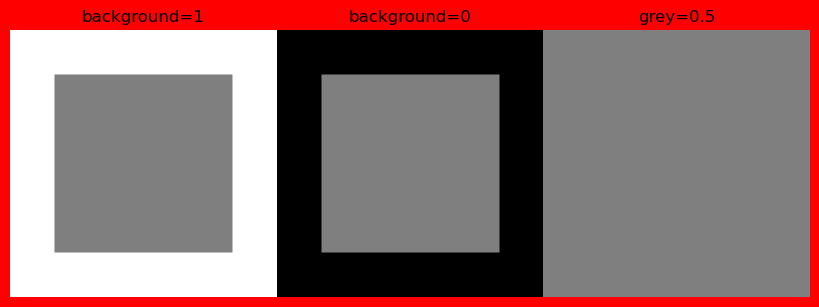

In [3]:
grey_low=1
grey_high=0
grey_middle=0.5
# width=100 
# locate=[100,100]
width=200 
locate=[50,50]
plot_illusion(grey_low,grey_high,grey_middle,width,locate,0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


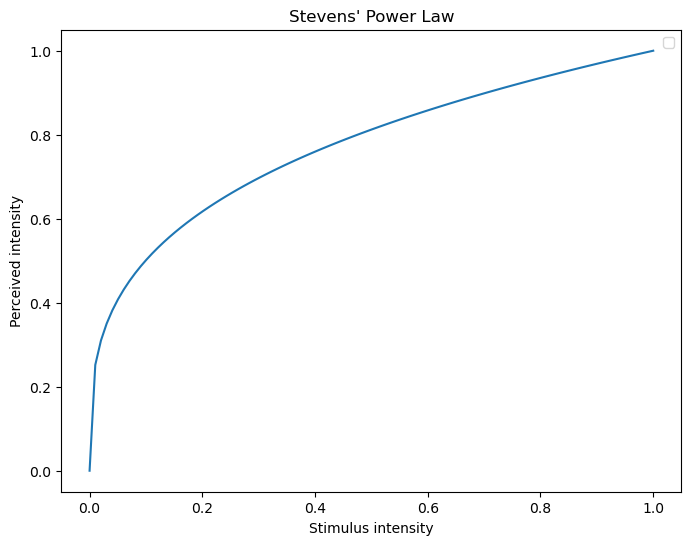

In [4]:
'''
Stevens' Power Law（史蒂文斯幂律）来描述。该定律的公式如下：
S = kI^a
其中，S是感知强度，I是刺激强度，k和a是实验测量得到的常数，其中a被称为幂指数。对于颜色亮度，实验测量结果表明，幂指数a的值通常在0.3到0.5之间。
'''
def stevens_power_law(I, a, k):
    return k * I**a

# 颜色亮度幂指数 a
a = 0.3
# 常数 k
k = 1
# 刺激强度 I
I = np.linspace(0, 1, 100)
# 绘制结果
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(I,stevens_power_law(I, a, k))
ax.set_xlabel('Stimulus intensity')
ax.set_ylabel('Perceived intensity')
ax.set_title('Stevens\' Power Law')
ax.legend()
plt.show()

In [10]:
def f(x, y, a):
    return a * np.log(x / y)

def hat_f(x, y, a, b):
    return a * np.log(x / y) + b * np.sign(np.log(x / y))

def reverse_f(x,f1,a):
    return x * np.exp(-f1 / a)

def reverse_f1(y,f1,a):
    return y * np.exp(f1 / a)

def reverse_f_complex(x, y, a, b):
    y1 = a * np.log(x / y) + b * np.sign(np.log(x / y))
    return x * np.exp(-y1 / a)

In [16]:
z=f(0.8,0.5,0.35)
print(z)
print(reverse_f(0.8,z,0.35))

0.16450127023600747
0.5


In [19]:
def compute(outer1,inner1,outer2,a,b):
    y1 = a * np.log(outer1 / inner1) + b * np.sign(np.log(outer1 / inner1))
    inner2 = outer2 * np.exp(-y1 / a)
    # f1=reverse_f_complex(outer1,inner1,a,b)
    # print(f1)
    # inner2=reverse_f(outer2,f1,a)
    return inner2

def plot(grey_low,grey_high,grey_middle1,grey_middle2,width,locate):
  '''
  注：灰度值越大，颜色越浅。黑色表示灰度值为0，白色表示灰度值为1。
  width: 方块的宽度
  locate: 方块左上角在图像中的位置，为二元组(x, y)
  '''
  img_save_path='/home/zhaobenyan/dataset/data_ill'
  gray_square1 = np.ones((width, width, 3)) * grey_middle1
  gray_square2 = np.ones((width, width, 3)) * grey_middle2
  gray_low_bg = np.ones((300, 300, 3)) * grey_low
  gray_low_bg[locate[0]:locate[0]+width, locate[1]:locate[1]+width, :] = gray_square1
  gray_high_bg = np.ones((300, 300, 3)) * grey_high
  gray_high_bg[locate[0]:locate[0]+width, locate[1]:locate[1]+width, :] = gray_square2
  gray=np.ones((300, 300, 3)) * grey_middle1
  # fig = plt.figure(facecolor='red')
  fig, ax = plt.subplots(1, 3, figsize=(8, 4),facecolor='grey')
  ax[0].imshow(gray_low_bg)
  ax[0].set_title(f'background={grey_low}')
  ax[0].axis('off')
  ax[1].imshow(gray_high_bg)
  ax[1].set_title(f'background={grey_high}')
  ax[1].axis('off')
  ax[2].imshow(gray)
  ax[2].set_title(f'grey={grey_middle1}')
  ax[2].axis('off')
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
  # plt.savefig(os.path.join(img_save_path, f'{pic_name}'))#第一个是指存储路径，第二个是图片名字
  # plt.close()
  plt.show()

a = 0.35
b = 0.003
inner2=compute(0.8,0.5,0.2,a,b)
print(inner2)


0.12393315017383776


In [20]:
left_outer=0.8
right_outer=0.2
left_inner=0.5
inner2=compute(left_outer,left_inner,right_outer,a,b)
print(inner2)


0.12393315017383776


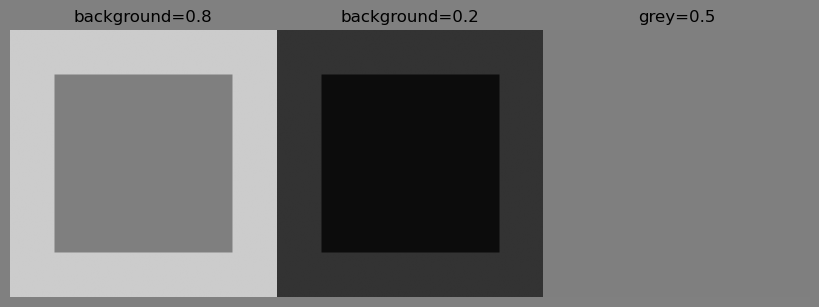

In [8]:
width=200 
locate=[50,50]
plot(left_outer,right_outer,left_inner,inner2,width,locate)

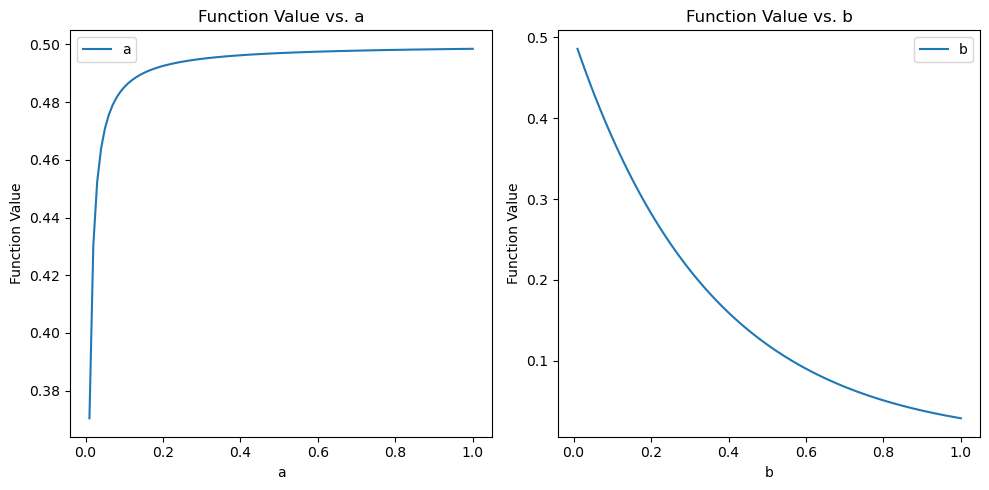

In [23]:
# 固定 x 和 y 的值
x = 0.8
y = 0.5

# 定义 a 和 b 的范围
a_values = np.linspace(0.01, 1, 100)
b_values = np.linspace(0.01, 1, 100)

# 创建画布和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 绘制关于 a 的曲线
ax1.plot(a_values, reverse_f_complex(x, y, a_values, 0.003), label='a')
ax1.set_xlabel('a')
ax1.set_ylabel('Function Value')
ax1.set_title('Function Value vs. a')
ax1.legend()

# 绘制关于 b 的曲线
ax2.plot(b_values, reverse_f_complex(x, y, 0.35, b_values), label='b')
ax2.set_xlabel('b')
ax2.set_ylabel('Function Value')
ax2.set_title('Function Value vs. b')
ax2.legend()

# 显示图形
plt.tight_layout()
plt.show()



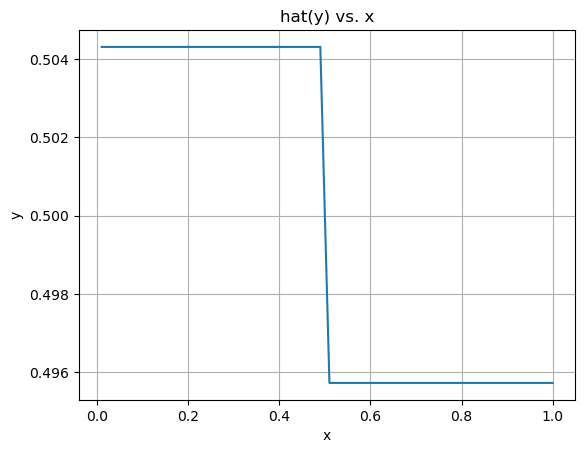

In [24]:
# 固定 a 和 b 的值
a = 0.35
b = 0.003

# 定义 x 的范围
x_values = np.linspace(0.01, 1, 100)

# 计算对应的 y 值
y_values = reverse_f_complex(x_values, 0.5, a, b)  # 这里将 y 固定为 1.0

# 绘制曲线图
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('hat(y) vs. x')
plt.grid(True)
plt.show()

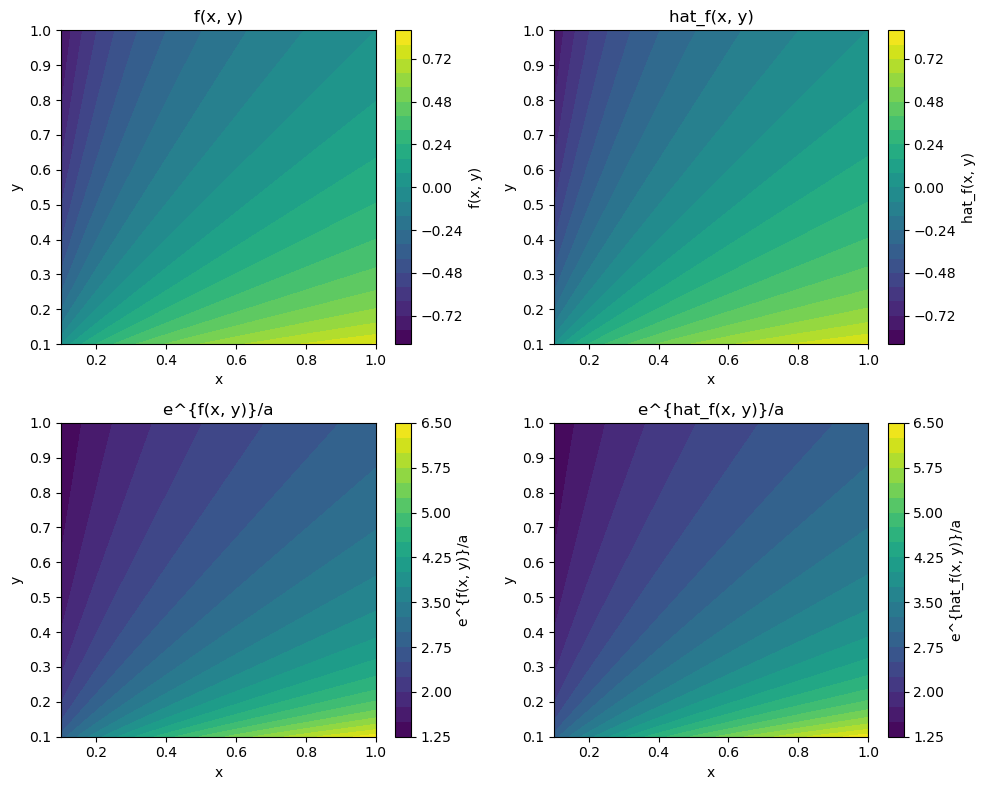

In [11]:
# 参数设置
a = 0.35
b = 0.003

# 创建 x 和 y 的网格
x = np.linspace(0.1, 1, 100)  # x 的取值范围：0.1 到 10
y = np.linspace(0.1, 1, 100)  # y 的取值范围：0.1 到 10
X, Y = np.meshgrid(x, y)

# 计算函数值
Z_f = f(X, Y, a)
Z_hat_f = hat_f(X, Y, a, b)
Z_exp_f = np.exp(Z_f) / a
Z_exp_hat_f = np.exp(Z_hat_f) / a

# 创建画布和子图
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 绘制 f(x, y) 的图像
c1 = axs[0, 0].contourf(X, Y, Z_f, levels=20, cmap='viridis')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
axs[0, 0].set_title('f(x, y)')

# 绘制 hat_f(x, y) 的图像
c2 = axs[0, 1].contourf(X, Y, Z_hat_f, levels=20, cmap='viridis')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')
axs[0, 1].set_title('hat_f(x, y)')

# 绘制 e^{f(x, y)}/a 的图像
c3 = axs[1, 0].contourf(X, Y, Z_exp_f, levels=20, cmap='viridis')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')
axs[1, 0].set_title('e^{f(x, y)}/a')

# 绘制 e^{hat_f(x, y)}/a 的图像
c4 = axs[1, 1].contourf(X, Y, Z_exp_hat_f, levels=20, cmap='viridis')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')
axs[1, 1].set_title('e^{hat_f(x, y)}/a')

#添加颜色条
cbar1 = fig.colorbar(c1, ax=axs[0, 0])
cbar1.set_label('f(x, y)')
cbar2 = fig.colorbar(c2, ax=axs[0, 1])
cbar2.set_label('hat_f(x, y)')
cbar3 = fig.colorbar(c3, ax=axs[1, 0])
cbar3.set_label('e^{f(x, y)}/a')
cbar4 = fig.colorbar(c4, ax=axs[1, 1])
cbar4.set_label('e^{hat_f(x, y)}/a')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

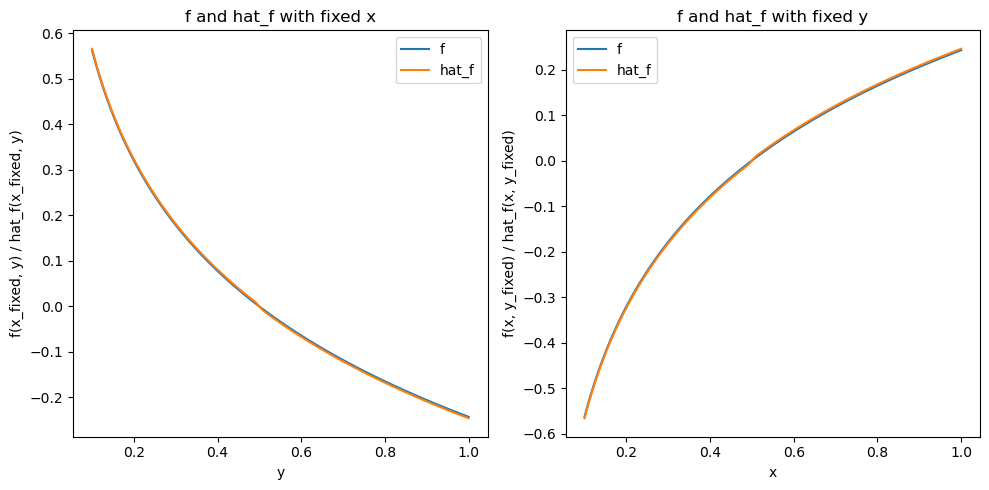

In [12]:
# 创建 x 和 y 的取值范围
x = np.linspace(0.1, 1, 100)  # x 的取值范围：0.1 到 10
y = np.linspace(0.1, 1, 100)  # y 的取值范围：0.1 到 10

# 固定 x，绘制 f 和 hat_f 关于 y 的变化曲线图
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

x_fixed = 0.5  # 固定的 x 值

f_y = f(x_fixed, y, a)
hat_f_y = hat_f(x_fixed, y, a, b)

axs[0].plot(y, f_y, label='f')
axs[0].plot(y, hat_f_y, label='hat_f')
axs[0].set_xlabel('y')
axs[0].set_ylabel('f(x_fixed, y) / hat_f(x_fixed, y)')
axs[0].set_title('f and hat_f with fixed x')
axs[0].legend()

# 固定 y，绘制 f 和 hat_f 关于 x 的变化曲线图
y_fixed = 0.5  # 固定的 y 值

f_x = f(x, y_fixed, a)
hat_f_x = hat_f(x, y_fixed, a, b)

axs[1].plot(x, f_x, label='f')
axs[1].plot(x, hat_f_x, label='hat_f')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x, y_fixed) / hat_f(x, y_fixed)')
axs[1].set_title('f and hat_f with fixed y')
axs[1].legend()

plt.tight_layout()
plt.show()

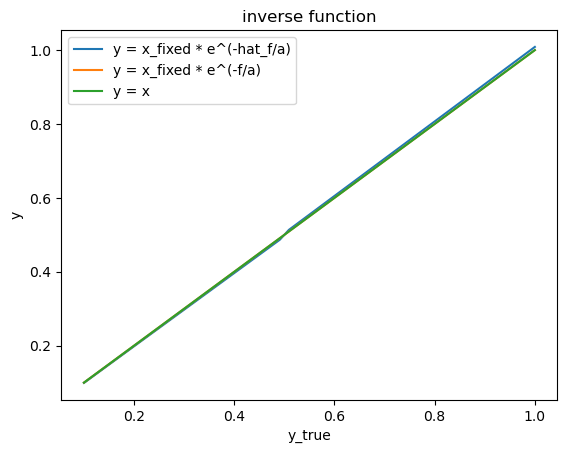

In [13]:
# 创建 x 和 y 的取值范围
x = np.linspace(0.1, 1, 100)  # x 的取值范围：0.1 到 10
y = np.linspace(0.1, 1, 100)  # y 的取值范围：0.1 到 10

# 固定 x，计算 f 和 hat_f 的值
x_fixed = 0.5  # 固定的 x 值

f_y = f(x_fixed, y, a)
hat_f_y = hat_f(x_fixed, y, a, b)

# 计算 y = x_fixed * e^(-hat_f/a) 和 y = x_fixed * e^(-f/a)
y_hat_f = x_fixed * np.exp(-hat_f_y / a)
y_f = x_fixed * np.exp(-f_y / a)

# 绘制曲线
plt.plot(y, y_hat_f, label='y = x_fixed * e^(-hat_f/a)')
plt.plot(y, y_f, label='y = x_fixed * e^(-f/a)')
plt.plot(y, y, label='y = x')  # 添加直线 y = x
plt.xlabel('y_true')
plt.ylabel('y')
plt.title('inverse function')
plt.legend()

plt.show()

In [14]:
def plot_illusion_visual(grey_low,grey_high,grey_middle,width,locate,hat_left,hat_right):
  gray_square = np.ones((width, width, 3)) * grey_middle
  gray_low_bg = np.ones((300, 300, 3)) * grey_low
  gray_low_bg[locate[0]:locate[0]+width, locate[1]:locate[1]+width, :] = gray_square
  gray_high_bg = np.ones((300, 300, 3)) * grey_high
  gray_high_bg[locate[0]:locate[0]+width, locate[1]:locate[1]+width, :] = gray_square
  gray=np.ones((300, 300, 3)) * grey_middle
  hat_left_bg = np.ones((300, 300, 3)) * hat_left
  hat_right_bg = np.ones((300, 300, 3)) * hat_right
  fig, axs = plt.subplots(2, 3, figsize=(8, 4))
  axs[0, 0].imshow(gray_low_bg)
  axs[0, 0].set_title(f'background={grey_low}')
  axs[0, 0].axis('off')
  axs[0, 1].imshow(gray_high_bg)
  axs[0, 1].set_title(f'background={grey_high}')
  axs[0, 1].axis('off')
  axs[0, 2].imshow(gray)
  axs[0, 2].set_title(f'grey={grey_middle}')
  axs[0, 2].axis('off')
  axs[1, 0].imshow(hat_left_bg)
  axs[1, 0].set_title(f'hat_left_bg={np.round(hat_left,6)}')
  axs[1, 0].axis('off')
  axs[1, 1].imshow(hat_right_bg)
  axs[1, 1].set_title(f'hat_right_bg={np.round(hat_right,6)}')
  axs[1, 1].axis('off')
  axs[1, 2].imshow(gray)
  axs[1, 2].set_title(f'grey={grey_middle}')
  axs[1, 2].axis('off')
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
  # plt.savefig(os.path.join(img_save_path, f'{pic_name}'))#第一个是指存储路径，第二个是图片名字
  # plt.close()
  plt.show()

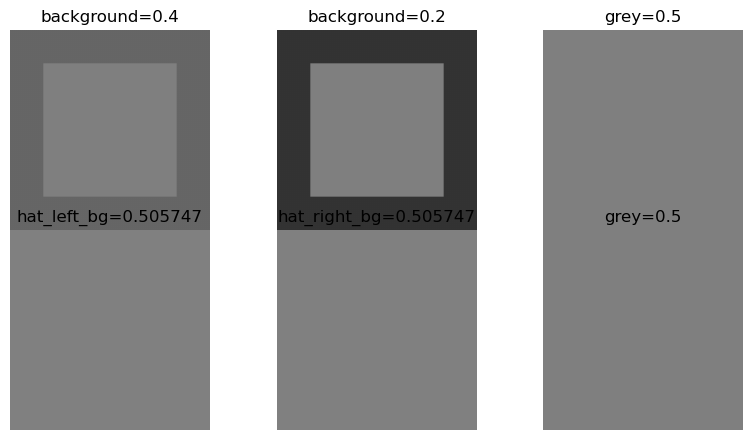

In [15]:
grey_low=0.4
grey_high=0.2
grey_middle=0.5
width=200
locate=[50,50]
a = 0.35
b = 0.004
y_left=f(grey_low,grey_middle,a)
y_left_hat=hat_f(grey_low,grey_middle,a,b)

y_right=f(grey_high,grey_middle,a)
y_right_hat=hat_f(grey_high,grey_middle,a,b)

y_reverse_left=reverse_f(grey_low,y_left,a)
y_reverse_right=reverse_f(grey_high,y_right,a)

hat_y_reverse_left=reverse_f(grey_low,y_left_hat,a)
hat_y_reverse_right=reverse_f(grey_high,y_right_hat,a)

plot_illusion_visual(grey_low,grey_high,grey_middle,width,locate,hat_y_reverse_left,hat_y_reverse_right)